## 3. Procesamiento de Datos

In [11]:
#Cargar Datos
import pandas as pd

df = pd.read_csv("flavors_of_cacao.csv")
df.head()
df.columns = (
    df.columns
      .str.replace("\n", " ", regex=False)
      .str.strip()
)


In [12]:
#Inspección inicial
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company  (Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1794 non-null   object 
 8   Broad Bean Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


### Limpiar los nombres de las columnas

los nombres originales de las columnas contenían saltos de línea (\n) y espacios irregulares, lo cual:

Dificulta el acceso a las columnas en el código

Pandas exige que el nombre sea exactamente igual.

"Cocoa Percent" ≠ "Cocoa\nPercent".

Provoca errores innecesarios (KeyError)

Aunque la columna existe, el programa no la reconoce.

Esto no es un problema del modelo, sino de formato del dato.

In [21]:
# =========================
# Selección de variables relevantes
# =========================

# Variables definidas en la formulación del problema
columns_used = [
    "Cocoa Percent",
    "Bean Type",
    "Broad Bean Origin",
    "Company Location",
    "Rating"
]

# Nos quedamos solo con las variables relevantes
df_proc = df[columns_used].copy()

df_proc.head()


,Cocoa Percent,Bean Type,Broad Bean Origin,Company Location,Rating
0,63.0,,Sao Tome,France,3.75
1,70.0,,Togo,France,2.75
2,70.0,,Togo,France,3.00
3,70.0,,Togo,France,3.50
4,70.0,,Peru,France,3.50


Limpiar porcentaje de cacao (ej. "70%" → 70)

In [22]:
# =========================
# Limpieza de datos y valores faltantes
# =========================

# Convertir Cocoa Percent de texto ("70%") a valor numérico (70.0)
df_proc["Cocoa Percent"] = (
    df_proc["Cocoa Percent"]
      .astype(str)
      .str.replace("%", "", regex=False)
      .astype(float)
)

# Verificar valores faltantes
df_proc.isnull().sum()

# Imputación de valores faltantes
# - Numérico: media
df_proc["Cocoa Percent"].fillna(df_proc["Cocoa Percent"].mean(), inplace=True)

# - Categóricos: etiqueta "Unknown"
for col in ["Bean Type", "Broad Bean Origin", "Company Location"]:
    df_proc[col].fillna("Unknown", inplace=True)

df_proc.isnull().sum()


C:\Users\maria\AppData\Local\Temp\ipykernel_28072\1528753811.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_proc["Cocoa Percent"].fillna(df_proc["Cocoa Percent"].mean(), inplace=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_28072\1528753811.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Cocoa Percent        0
Bean Type            0
Broad Bean Origin    0
Company Location     0
Rating               0
dtype: int64

Creación de la variable objetivo (Y)

In [23]:
# =========================
# Creación de la variable objetivo (Quality)
# =========================

def quality_label(rating):
    if rating <= 2.5:
        return 1   # Baja calidad
    elif rating <= 3.75:
        return 2   # Calidad media
    else:
        return 3   # Alta calidad

df_proc["Quality"] = df_proc["Rating"].apply(quality_label)

# Revisar distribución de clases
df_proc["Quality"].value_counts()


Quality
2    1505
1     190
3     100
Name: count, dtype: int64

Codificación de variables categóricas

In [24]:
# =========================
# Codificación de variables categóricas
# =========================

# X preliminar (sin Rating ni Quality)
X_raw = df_proc.drop(columns=["Rating", "Quality"])

# One-Hot Encoding
X_encoded = pd.get_dummies(
    X_raw,
    columns=["Bean Type", "Broad Bean Origin", "Company Location"],
    drop_first=True
)

X_encoded.head()


,Cocoa Percent,Bean Type_Amazon mix,"Bean Type_Amazon, ICS",Bean Type_Beniano,Bean Type_Blend,"Bean Type_Blend-Forastero,Criollo",Bean Type_CCN51,Bean Type_Criollo,Bean Type_Criollo (Amarru),Bean Type_Criollo (Ocumare 61),...,Company Location_Spain,Company Location_St. Lucia,Company Location_Suriname,Company Location_Sweden,Company Location_Switzerland,Company Location_U.K.,Company Location_U.S.A.,Company Location_Venezuela,Company Location_Vietnam,Company Location_Wales
0,63.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,70.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,70.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,70.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,70.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Normalización de variables numéricas

In [25]:
# =========================
# Normalización de variables numéricas
# =========================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_encoded["Cocoa Percent"] = scaler.fit_transform(
    X_encoded[["Cocoa Percent"]]
)


Detección simple de outliers (análisis, no eliminación)

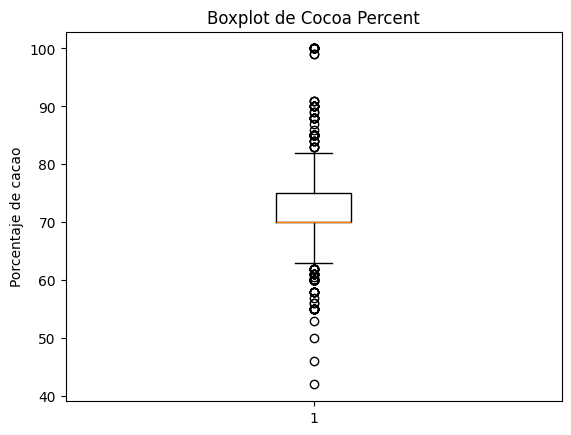

In [26]:
# =========================
# Detección de outliers (exploratoria)
# =========================

import matplotlib.pyplot as plt

plt.boxplot(df_proc["Cocoa Percent"])
plt.title("Boxplot de Cocoa Percent")
plt.ylabel("Porcentaje de cacao")
plt.show()


Definición final de X y Y (listos para ML)

In [27]:
# =========================
# Definición final de X y Y
# =========================

X = X_encoded
y = df_proc["Quality"]

# Dimensiones del problema
n, m = X.shape
print(f"X ∈ R^({n} × {m})")
print("y ∈ {1, 2, 3}")


X ∈ R^(1795 × 201)
y ∈ {1, 2, 3}


Visualizaciones exploratorias (EDA ligero)

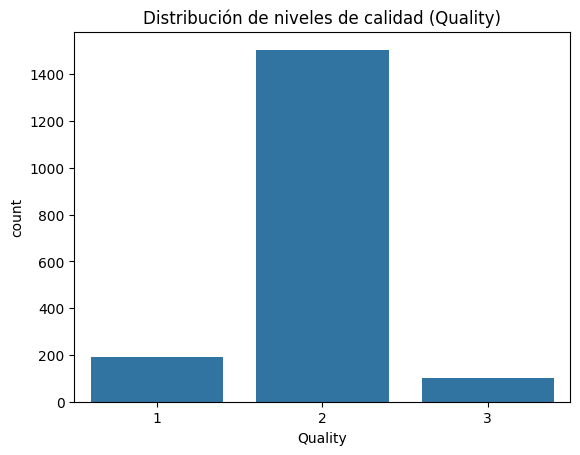

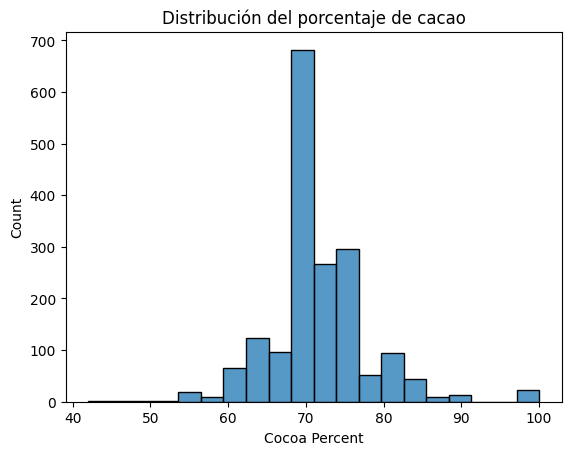

In [28]:
# =========================
# Visualización exploratoria
# =========================

import seaborn as sns

# Distribución de clases
sns.countplot(x=y)
plt.title("Distribución de niveles de calidad (Quality)")
plt.show()

# Distribución de Cocoa Percent (sin normalizar)
sns.histplot(df_proc["Cocoa Percent"], bins=20)
plt.title("Distribución del porcentaje de cacao")
plt.show()


En esta etapa se realizó el procesamiento completo de los datos, incluyendo selección de variables relevantes, limpieza, imputación de valores faltantes, creación de la variable objetivo, codificación de variables categóricas, normalización de variables numéricas y análisis exploratorio. El conjunto de datos resultante queda preparado para el entrenamiento de modelos de clasificación.

### ENTRENAMIENTO (Etapa 4)

In [33]:
# =========================
# 4. Entrenamiento del modelo
# =========================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# División del dataset (train, validation, test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

# Modelo base: regresión logística multiclase
model = LogisticRegression(
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

# Evaluación inicial
val_pred = model.predict(X_val)
accuracy_score(y_val, val_pred)


0.8440111420612814

In [34]:
# Ajuste de hiperparámetros con Grid Search
param_grid = {
    "C": [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    LogisticRegression(
        solver="lbfgs",
        max_iter=1000,
        random_state=42
    ),
    param_grid,
    scoring="accuracy",
    cv=5
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
grid.best_params_


{'C': 0.1}

## 5.3 Evaluación con métricas clásicas (código)

In [35]:
from sklearn.metrics import classification_report

# Predicciones del modelo final
y_test_pred = best_model.predict(X_test)

# Reporte completo
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        38
           2       0.84      1.00      0.91       301
           3       0.00      0.00      0.00        20

    accuracy                           0.84       359
   macro avg       0.28      0.33      0.30       359
weighted avg       0.70      0.84      0.76       359



c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

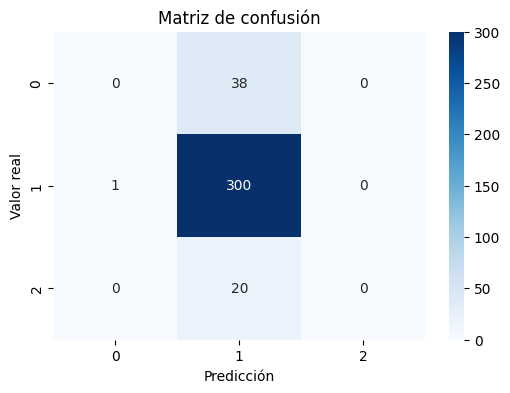

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show()


In [37]:
train_acc = best_model.score(X_train, y_train)
test_acc = best_model.score(X_test, y_test)

train_acc, test_acc


(0.8440111420612814, 0.8356545961002786)

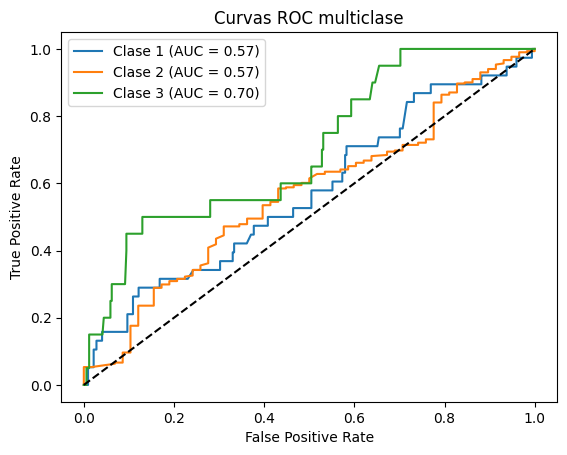

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar etiquetas
y_test_bin = label_binarize(y_test, classes=[1,2,3])
y_score = best_model.predict_proba(X_test)

plt.figure()

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Clase {i+1} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC multiclase")
plt.legend()
plt.show()


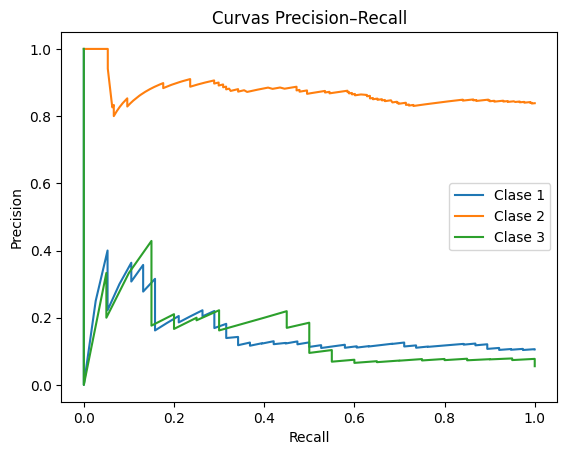

In [39]:
from sklearn.metrics import precision_recall_curve

plt.figure()

for i in range(3):
    precision, recall, _ = precision_recall_curve(
        y_test_bin[:, i], y_score[:, i]
    )
    plt.plot(recall, precision, label=f"Clase {i+1}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas Precision–Recall")
plt.legend()
plt.show()
